In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download alinedobrovsky/plant-disease-classification-merged-dataset

100% 17.3G/17.3G [10:43<00:00, 35.4MB/s]
100% 17.3G/17.3G [10:43<00:00, 28.9MB/s]


In [ ]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
import cv2

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
import shutil

In [ ]:
shutil.unpack_archive('plant-disease-classification-merged-dataset.zip', '/content/DatasetDisease')

In [ ]:
path = '/content/DatasetDisease'

In [ ]:
lst = os.listdir(path)
lst.sort()
lst

['Apple__black_rot',
 'Apple__healthy',
 'Apple__rust',
 'Apple__scab',
 'Cassava__bacterial_blight',
 'Cassava__brown_streak_disease',
 'Cassava__green_mottle',
 'Cassava__healthy',
 'Cassava__mosaic_disease',
 'Cherry__healthy',
 'Cherry__powdery_mildew',
 'Chili__healthy',
 'Chili__leaf curl',
 'Chili__leaf spot',
 'Chili__whitefly',
 'Chili__yellowish',
 'Coffee__cercospora_leaf_spot',
 'Coffee__healthy',
 'Coffee__red_spider_mite',
 'Coffee__rust',
 'Corn__common_rust',
 'Corn__gray_leaf_spot',
 'Corn__healthy',
 'Corn__northern_leaf_blight',
 'Cucumber__diseased',
 'Cucumber__healthy',
 'Gauva__diseased',
 'Gauva__healthy',
 'Grape__black_measles',
 'Grape__black_rot',
 'Grape__healthy',
 'Grape__leaf_blight_(isariopsis_leaf_spot)',
 'Jamun__diseased',
 'Jamun__healthy',
 'Lemon__diseased',
 'Lemon__healthy',
 'Mango__diseased',
 'Mango__healthy',
 'Peach__bacterial_spot',
 'Peach__healthy',
 'Pepper_bell__bacterial_spot',
 'Pepper_bell__healthy',
 'Pomegranate__diseased',
 'Pome

In [ ]:
usedClass = [
 'Apple__black_rot',
 'Apple__healthy',
 'Apple__rust',
 'Apple__scab',
 'Chili__healthy',
 'Chili__leaf curl',
 'Chili__leaf spot',
 'Chili__whitefly',
 'Chili__yellowish',
 'Coffee__cercospora_leaf_spot',
 'Coffee__healthy',
 'Coffee__red_spider_mite',
 'Coffee__rust',
 'Corn__common_rust',
 'Corn__gray_leaf_spot',
 'Corn__healthy',
 'Corn__northern_leaf_blight',
 'Grape__black_measles',
 'Grape__black_rot',
 'Grape__healthy',
 'Grape__leaf_blight_(isariopsis_leaf_spot)',
#  'Pepper_bell__bacterial_spot',
#  'Pepper_bell__healthy',
#  'Potato__early_blight',
#  'Potato__healthy',
#  'Potato__late_blight',
 'Rice__brown_spot',
 'Rice__healthy',
 'Rice__hispa',
 'Rice__leaf_blast',
 'Rice__neck_blast',
#  'Soybean__bacterial_blight',
#  'Soybean__caterpillar',
#  'Soybean__diabrotica_speciosa',
#  'Soybean__downy_mildew',
#  'Soybean__healthy',
#  'Soybean__mosaic_virus',
#  'Soybean__powdery_mildew',
#  'Soybean__rust',
#  'Soybean__southern_blight',
#  'Tea__algal_leaf',
#  'Tea__anthracnose',
#  'Tea__bird_eye_spot',
#  'Tea__brown_blight',
#  'Tea__healthy',
#  'Tea__red_leaf_spot',
 'Tomato__bacterial_spot',
 'Tomato__early_blight',
 'Tomato__healthy',
 'Tomato__late_blight',
 'Tomato__leaf_mold',
 'Tomato__mosaic_virus',
 'Tomato__septoria_leaf_spot',
 'Tomato__spider_mites_(two_spotted_spider_mite)',
 'Tomato__target_spot',
 'Tomato__yellow_leaf_curl_virus'
]

In [ ]:
image_dir = Path(path)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.PNG')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [ ]:
image_df

,Filepath,Label
0,/content/DatasetDisease/Jamun__diseased/0017_0...,Jamun__diseased
1,/content/DatasetDisease/Jamun__diseased/0017_0...,Jamun__diseased
2,/content/DatasetDisease/Jamun__diseased/0017_0...,Jamun__diseased
3,/content/DatasetDisease/Jamun__diseased/0017_0...,Jamun__diseased
4,/content/DatasetDisease/Jamun__diseased/0017_0...,Jamun__diseased
...,...,...
79079,/content/DatasetDisease/Coffee__healthy/C1P5E1...,Coffee__healthy
79080,/content/DatasetDisease/Coffee__healthy/C1P19E...,Coffee__healthy
79081,/content/DatasetDisease/Coffee__healthy/C8P29E...,Coffee__healthy
79082,/content/DatasetDisease/Coffee__healthy/C9P23E...,Coffee__healthy


In [ ]:
labels_to_filter = usedClass
image_df = image_df[image_df['Label'].isin(labels_to_filter)]

In [ ]:
len(image_df['Label'].unique())

36

In [ ]:
image_df = image_df.reset_index()

## Subset Data

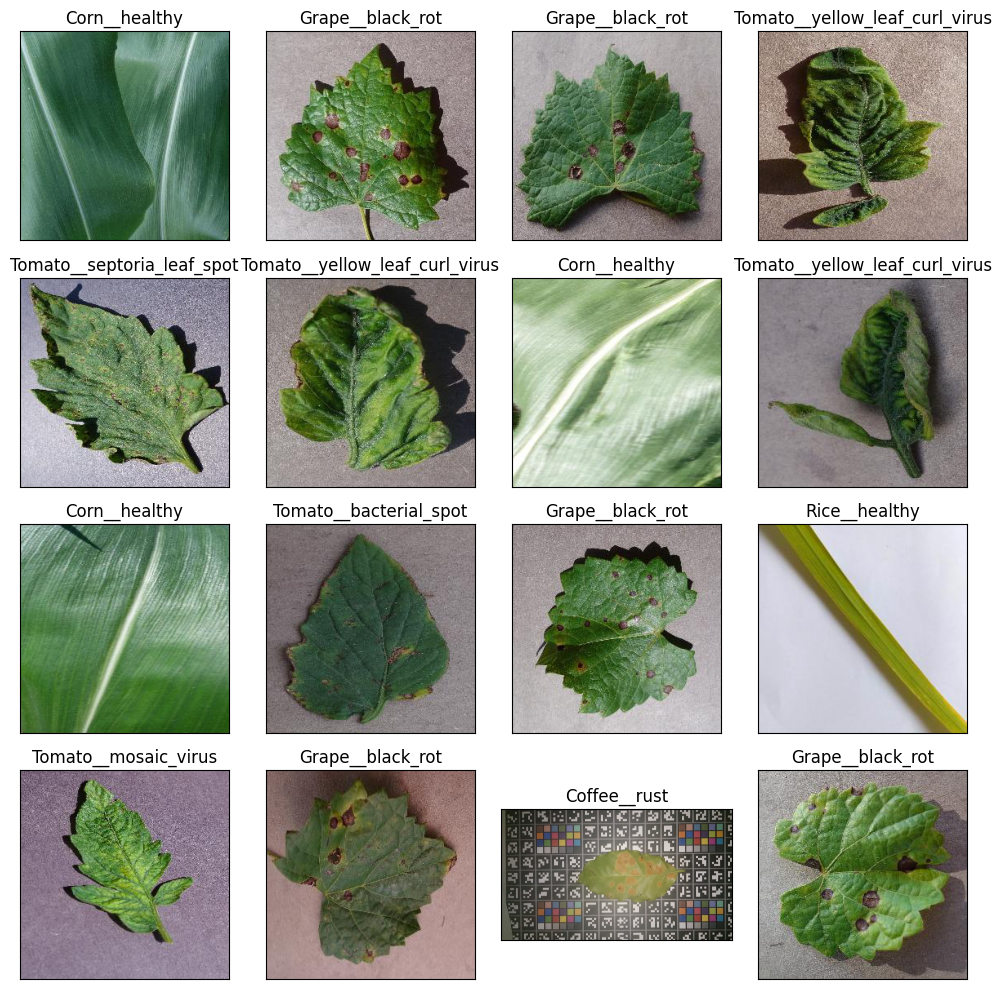

In [ ]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

### Data Processing

In [ ]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
     rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 28551 validated image filenames belonging to 36 classes.
Found 7137 validated image filenames belonging to 36 classes.
Found 8923 validated image filenames belonging to 36 classes.


In [ ]:
image_batch, label_batch = next(val_images)
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 36))

## Data Training

In [ ]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model():
  """
  Initializes an InceptionV3 model.
  
  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file
    
  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """

  pre_trained_model = tf.keras.applications.InceptionV3(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
) 

  

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False



  return pre_trained_model


In [ ]:
pre_trained_model = create_pre_trained_model()

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [ ]:
# Create checkpoint callback
checkpoint_path = "disease_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [ ]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) # if val loss decreases for 3 epochs in a row, stop training

In [ ]:
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layer output of a model
  
  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from
    
  Returns:
    last_output: output of the model's last layer 
  """

  last_desired_layer = pre_trained_model.get_layer('mixed9')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)


  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 5, 5, 2048)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 2048), dtype=tf.float32, name=None), name='mixed9/concat:0', description="created by layer 'mixed9'")


In [ ]:
def create_final_model(pre_trained_model, last_output):
  """
  Appends a custom model to a pre-trained model
  
  Args:
    pre_trained_model (tf.keras Model): model that will accept the train/test inputs
    last_output (tensor): last layer output of the pre-trained model
    
  Returns:
    model: the combined model
  """
  x = layers.GlobalAveragePooling2D()(last_output)
  x=tf.keras.layers.Dense(units=512, activation='relu')(x)
  x=tf.keras.layers.Dropout(0.2)(x)
  x=tf.keras.layers.Dense(units=256, activation='relu')(x)
  x=tf.keras.layers.Dropout(0.2)(x)
  x=tf.keras.layers.Dense(units=128, activation='relu')(x)
  x=tf.keras.layers.Dense(units=36, activation='softmax')(x)      

  # Create the complete model by using the Model class
  model = Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = 'adam', 
                loss ='categorical_crossentropy',
                metrics = ['accuracy'])

  
  return model

In [ ]:
model = create_final_model(pre_trained_model, last_output)
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 16,940,676 total parameters in this model.
There are 1,217,956 trainable parameters in this model.


In [ ]:
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=25,
    callbacks=[
        early_stopping,
        checkpoint_callback,
    ]
)

Epoch 1/25
893/893 [==============================] - 739s 810ms/step - loss: 0.8272 - accuracy: 0.7321 - val_loss: 0.4365 - val_accuracy: 0.8456
Epoch 2/25
893/893 [==============================] - 678s 759ms/step - loss: 0.4778 - accuracy: 0.8341 - val_loss: 0.3947 - val_accuracy: 0.8562
Epoch 3/25
893/893 [==============================] - 662s 742ms/step - loss: 0.4220 - accuracy: 0.8556 - val_loss: 0.3818 - val_accuracy: 0.8705
Epoch 4/25
893/893 [==============================] - 678s 760ms/step - loss: 0.3809 - accuracy: 0.8661 - val_loss: 0.3313 - val_accuracy: 0.8827
Epoch 5/25
893/893 [==============================] - 671s 751ms/step - loss: 0.3613 - accuracy: 0.8743 - val_loss: 0.3324 - val_accuracy: 0.8813
Epoch 6/25
893/893 [==============================] - 657s 737ms/step - loss: 0.3464 - accuracy: 0.8776 - val_loss: 0.3046 - val_accuracy: 0.8899
Epoch 7/25
893/893 [==============================] - 657s 737ms/step - loss: 0.3286 - accuracy: 0.8837 - val_loss: 0.2963 -

In [ ]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.25784
Test Accuracy: 90.78%


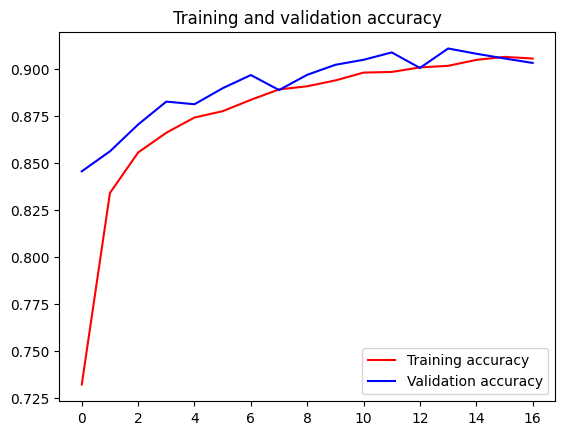

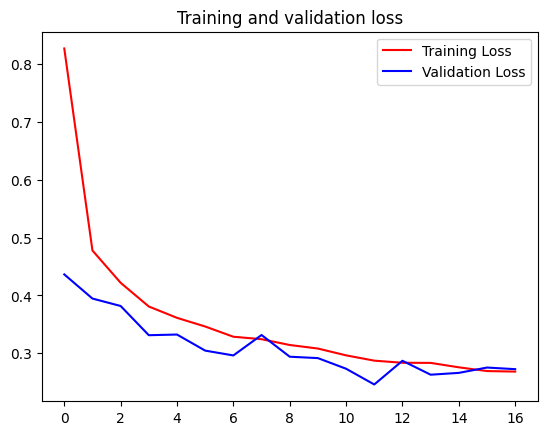

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# plot_loss_curves(history)

## Fine Tune 

In [ ]:
print("Number of layers in the base model: ", len(pre_trained_model.layers))

Number of layers in the base model:  311


In [ ]:
pre_trained_model.trainable = True
fine_tune_at = 50

# Freeze all the layers before the `fine_tune_at` layer
for layer in pre_trained_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
print('Number of trainable weights = {}'.format(len(model1.trainable_weights)))

In [ ]:
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=20,
    callbacks=[
        early_stopping,
        checkpoint_callback,
    ]
)

Epoch 1/20
893/893 [==============================] - 715s 767ms/step - loss: 0.5337 - accuracy: 0.8275 - val_loss: 0.2650 - val_accuracy: 0.9050
Epoch 2/20
893/893 [==============================] - 680s 762ms/step - loss: 0.2894 - accuracy: 0.9019 - val_loss: 0.2069 - val_accuracy: 0.9252
Epoch 3/20
893/893 [==============================] - 693s 776ms/step - loss: 0.2320 - accuracy: 0.9202 - val_loss: 0.1833 - val_accuracy: 0.9367
Epoch 4/20
893/893 [==============================] - 703s 787ms/step - loss: 0.2023 - accuracy: 0.9307 - val_loss: 0.1634 - val_accuracy: 0.9403
Epoch 5/20
893/893 [==============================] - 690s 773ms/step - loss: 0.1823 - accuracy: 0.9379 - val_loss: 0.1548 - val_accuracy: 0.9470
Epoch 6/20
893/893 [==============================] - 690s 772ms/step - loss: 0.1696 - accuracy: 0.9421 - val_loss: 0.1544 - val_accuracy: 0.9458
Epoch 7/20
893/893 [==============================] - 676s 757ms/step - loss: 0.1547 - accuracy: 0.9464 - val_loss: 0.1498 -

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/model_bangkit.h5')

In [ ]:
model.save('/content/drive/MyDrive/Dataset Iwak/model_bangkit.h5')

In [ ]:
new_model= tf.keras.models.load_model(filepath="/content/drive/MyDrive/Dataset Iwak/model_bangkit.h5")

In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(224, 224))
  
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = new_model.predict(images, batch_size=5)
  
  print(classes)

Saving th.jpg to th.jpg
1/1 [==============================] - 1s 1s/step
[[7.0396743e-07 1.0421710e-06 1.4929379e-04 2.9486841e-05 3.7737901e-04
  1.6589805e-04 2.7269907e-03 6.8985537e-04 2.2980126e-05 1.0788724e-05
  3.8529450e-07 3.8026369e-06 2.7364371e-05 1.2101821e-01 3.3576888e-01
  1.2140800e-04 5.3579497e-01 9.0001940e-06 2.0239230e-04 2.5497860e-05
  2.2008786e-05 7.4395171e-04 3.6995898e-05 1.0831301e-05 3.8846058e-04
  1.1781190e-04 1.0659330e-03 7.8275887e-05 1.4897002e-05 2.3037528e-05
  3.3748120e-06 1.0413256e-04 2.1186736e-04 2.0442835e-06 4.3958044e-06
  2.5569232e-05]]
